In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [69]:
df= pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [70]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [72]:
df['Classes'] = df['Classes'].astype(str)
df['Classes'] = np.where(df['Classes'].str.contains("not fire"), 0, 1)


In [73]:
df.drop(['day','year'],axis=1,inplace=True)

In [74]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   month        243 non-null    int64  
 1   Temperature  243 non-null    int64  
 2   RH           243 non-null    int64  
 3   Ws           243 non-null    int64  
 4   Rain         243 non-null    float64
 5   FFMC         243 non-null    float64
 6   DMC          243 non-null    float64
 7   DC           243 non-null    float64
 8   ISI          243 non-null    float64
 9   BUI          243 non-null    float64
 10  FWI          243 non-null    float64
 11  Classes      243 non-null    int32  
 12  Region       243 non-null    int64  
dtypes: float64(7), int32(1), int64(5)
memory usage: 23.9 KB


<Axes: >

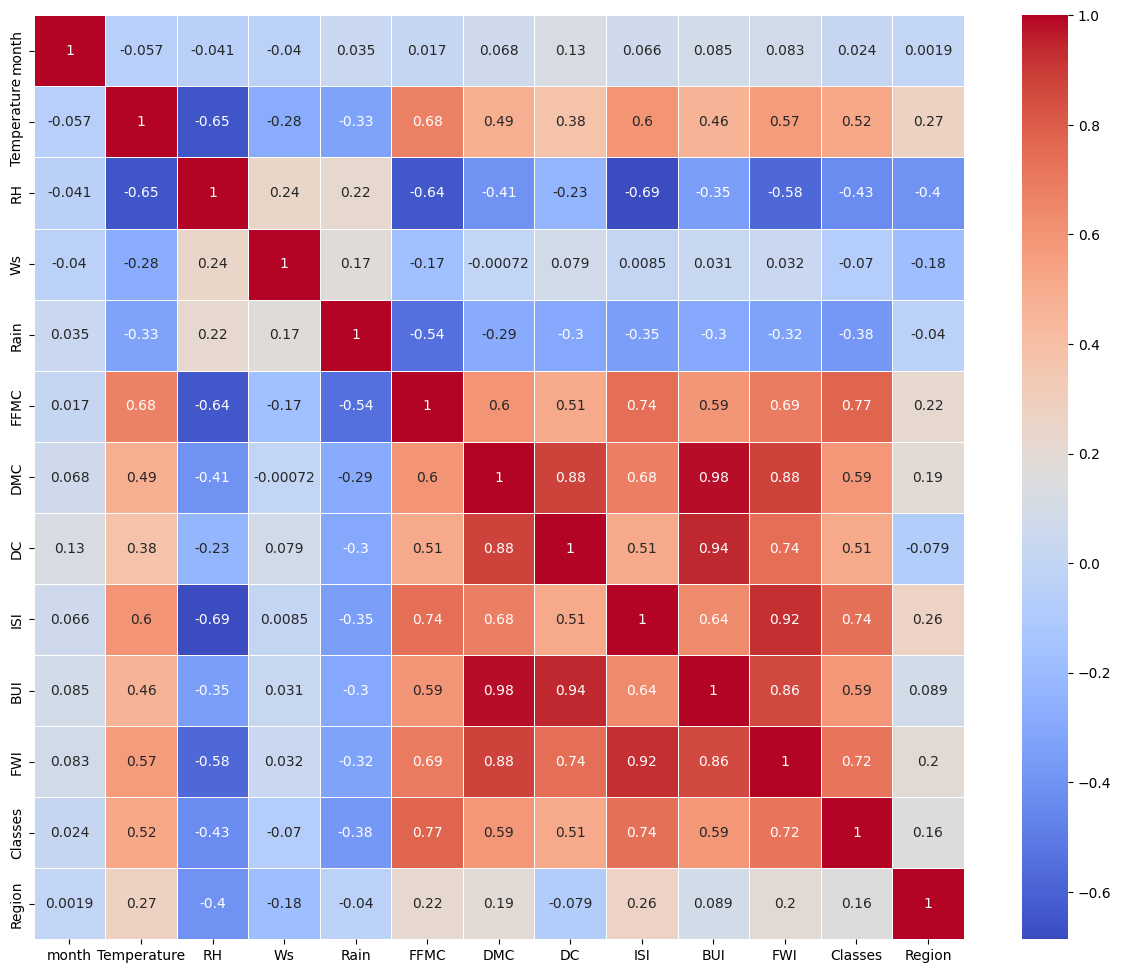

In [75]:
# Feature Scaling
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=0.5)

In [76]:
# droping month column because it is don't have any correlation with target variable 
df.drop('month',axis=1,inplace=True)

In [77]:
X=df.drop('FWI',axis=1)
y=df['FWI']


In [78]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [79]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((182, 11), (61, 11), (182,), (61,))

<Axes: >

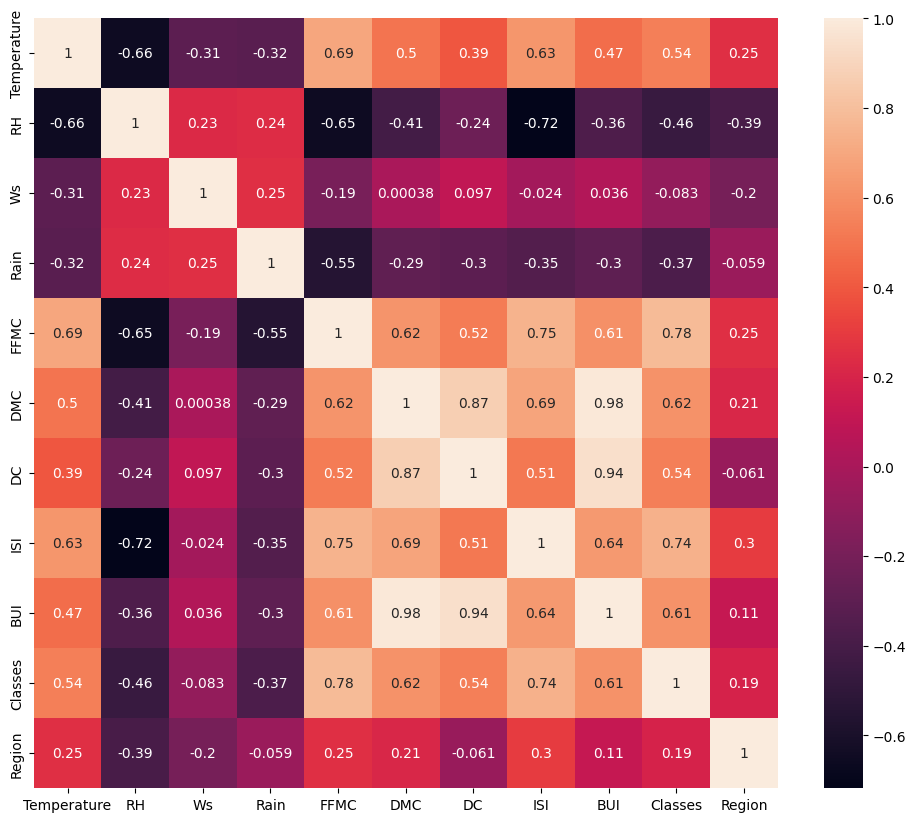

In [80]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)


In [81]:
## Droping the correlated features
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
## Threshold -- Domain Expertise 
corr_features = correlation(X_train,0.85)

In [82]:
type(X_train) 
type(X_test)

pandas.core.frame.DataFrame

In [83]:

X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)


## Feature Scaling Or Standardization

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

### Box plots to understand Effect of Standard Scaler

Text(0.5, 1.0, 'X train after scaled')

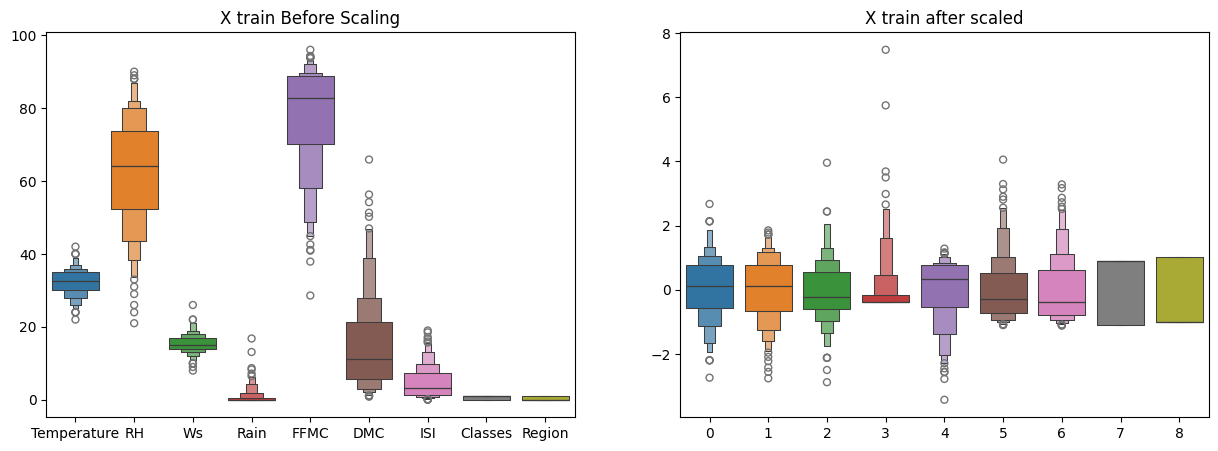

In [86]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxenplot(data=X_train)
plt.title("X train Before Scaling")
plt.subplot(1,2,2)
sns.boxenplot(data=X_train_scaled)
plt.title('X train after scaled')

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linReg = LinearRegression()
linReg.fit(X_train_scaled,y_train)
y_pred = linReg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mean_absolute_error" , mae)
print("r2_score",score)

mean_absolute_error 0.5468236465249978
r2_score 0.9847657384266951


In [88]:
import plotly.graph_objects as go

# Create a scatter plot
fig = go.Figure(data=go.Scatter(x=y_pred, y=y_test, mode='markers'))

# Add a line of perfect prediction
fig.add_trace(go.Scatter(x=y_test, y=y_test,
                    mode='lines',
                    name='Perfect Prediction'))

# Set the plot's title and labels
fig.update_layout(title='Predicted vs Actual Values',
                   yaxis_title='Predicted',
                   xaxis_title='Actual')

# Show the plot
fig.show()

### Lasso Regression

In [89]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score= r2_score(y_test,y_pred)
print("mean_absolute_error", mae)
print("r2_score",score)

mean_absolute_error 1.133175994914409
r2_score 0.9492020263112388


In [90]:
import plotly.graph_objects as go

# Create a scatter plot
fig = go.Figure(data=go.Scatter(x=y_pred, y=y_test, mode='markers'))

# Add a line of perfect prediction
fig.add_trace(go.Scatter(x=y_test, y=y_test,
                    mode='lines',
                    name='Perfect Prediction'))

# Set the plot's title and labels
fig.update_layout(title='Predicted vs Actual Values',
                   yaxis_title='Predicted',
                   xaxis_title='Actual')

# Show the plot
fig.show()

## CrossValidation

In [91]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV()


In [92]:
lassocv.fit(X_train_scaled,y_train)
y_pred = lassocv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
print("mean_absolute_error", mae)
score= r2_score(y_test,y_pred)
print("r2_score",score)

mean_absolute_error 0.619970115826343
r2_score 0.9820946715928275


In [93]:

# Create a scatter plot
fig = go.Figure(data=go.Scatter(x=y_pred, y=y_test, mode='markers'))

# Add a line of perfect prediction
fig.add_trace(go.Scatter(x=y_test, y=y_test,
                    mode='lines',
                    name='Perfect Prediction'))

# Set the plot's title and labels
fig.update_layout(title='Predicted vs Actual Values',
                   yaxis_title='Predicted',
                   xaxis_title='Actual')

# Show the plot
fig.show()

## Ridge Regression Model 

In [94]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mean_absolute_error", mae)
print("r2_score",score)

mean_absolute_error 0.5642305340105715
r2_score 0.9842993364555512


In [95]:


fig = go.Figure(data=go.Scatter(x=y_pred, y=y_test, mode='markers'))


fig.add_trace(go.Scatter(x=y_test, y=y_test,
                    mode='lines',
                    name='Perfect Prediction'))


fig.update_layout(title='Predicted vs Actual Values',
                   yaxis_title='Predicted',
                   xaxis_title='Actual')


fig.show()

## Cross Validation in ridge 

In [96]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)

In [97]:
ridgecv.fit(X_train_scaled,y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
print("mean_absolute_error", mae)
score= r2_score(y_test,y_pred)
print("r2_score",score)


mean_absolute_error 0.5642305340105715
r2_score 0.9842993364555512


In [98]:

# Create a scatter plot
fig = go.Figure(data=go.Scatter(x=y_pred, y=y_test, mode='markers'))

# Add a line of perfect prediction
fig.add_trace(go.Scatter(x=y_test, y=y_test,
                    mode='lines',
                    name='Perfect Prediction'))

# Set the plot's title and labels
fig.update_layout(title='Predicted vs Actual Values',
                   xaxis_title='Predicted',
                   yaxis_title='Actual')

# Show the plot
fig.show()

In [99]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

## Elasitc Regression


In [100]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.8822353634896005
R2 Score 0.8753460589519703


In [101]:

# Create a scatter plot
fig = go.Figure(data=go.Scatter(x=y_test, y=y_pred, mode='markers'))

# Add a line of perfect prediction
fig.add_trace(go.Scatter(x=y_test, y=y_test,
                    mode='lines',
                    name='Perfect Prediction'))

# Set the plot's title and labels
fig.update_layout(title='Predicted vs Actual Values',
                   xaxis_title='Predicted',
                   yaxis_title='Actual')

# Show the plot
fig.show()

Mean absolute error 0.6575946731430898
R2 Score 0.9814217587854941


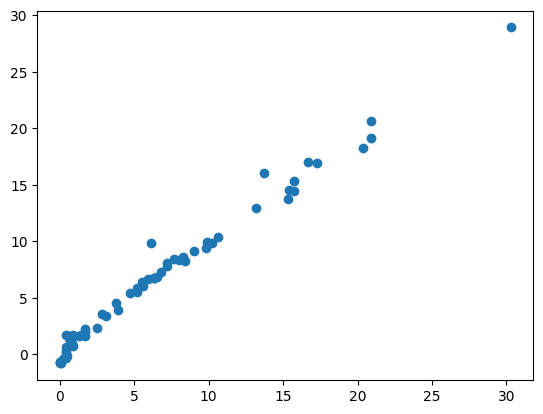

In [102]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [104]:

# Create a scatter plot
fig = go.Figure(data=go.Scatter(x=y_test, y=y_pred, mode='markers'))

# Add a line of perfect prediction
fig.add_trace(go.Scatter(x=y_test, y=y_test,
                    mode='lines',
                    name='Perfect Prediction'))

# Set the plot's title and labels
fig.update_layout(title='Predicted vs Actual Values',
                   xaxis_title='Actual',
                   yaxis_title='Predicted')

# Show the plot
fig.show()

## Pickling the model

In [105]:
scaler

StandardScaler()

In [106]:
ridge

Ridge()

In [ ]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))